# **Семинар 5. Описательные статистики. Пропуски и выбросы.**

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>

## Структура семинара

1. [Частотные распределения](#1-частотные-распределения)
    - *Что такое распределение?*
    - *Столбчатая диаграмма*
    - *Гистограмма*
    - *Способы описания частотных распределений*
2. [Меры центральной тенденции](#2-меры-центральной-тенденции)
    - *Среднее арифметическое*
    - *Медиана*
    - *Мода*
3. [Формы распределений](#3-формы-распределений)
    - *Симметричные распределения*
    - *Ассиметричные распределения*: скошенные влево и вправо
4. [Меры разброса](#4-меры-разброса)
    - *Размах*
    - *Интерквартильный размах*
    - *Стандартное отклонение и дисперсия*
5. [Пропущенные значения](#5-пропущенные-значения)
    - *Работа с пропусками*
    - *Поиск пропусков*
    - *Модификация пропущенных значений*
6. [Выбросы](#6-выбросы-outliers)
    - *Правило* $1.5 \cdot IQR$
    - *Правило* $3 \cdot std$
    - *Визуализация: ящик с усами*
7. [Задания из НЭ](#задания-нэ)
    - A4
    - A5
    - A6

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Частотные распределения

## 1.1 Что такое распределение?
**Частотное распределение** — это соответствие между *значениями* переменной и их *вероятностями* (на практике – *количеством* таких значений в выборке). Иначе говоря, это способ описания того, как часто встречаются значения данных в заданном интервале. 
- Помогает понять, как распределены данные в выборке
- Можно представить в виде частотной таблицы (например, с помощью `.value_counts()`) или на графике (гистограмма, столбчатая диаграмма).

## 1.2 Столбчатая диаграмма
**Столбчатая диаграмма** показывает, как часто встречаются отдельные категории или дискретные значения в выборке.
- Используются для визуализации **дискретных величин** (если их немного) или **категорий**
- **Есть промежутки** между столбиками (*gaps*) - обозначают независимость категорий
- [Синтаксис](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) построения столбчатой диаграммы:

    ```python
        table_name['column_name'].value_counts().plot(kind='bar')
    ```

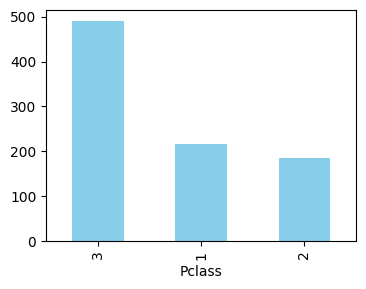

In [4]:
df['Pclass'].value_counts().plot(kind='bar', figsize=(4, 3), color='skyblue');

## 1.3 Гистограмма
**Гистограмма** показывает, как распределены значения на *непрерывных интервалах*.
- Используются для визуализации распределения **непрерывных** или **дискретных** величин (если их много)
- **Нет промежутков** между столбиками, так как данные разбиваются на интервалы ("бины")
- [Синтаксис](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) построения гистограммы:

    ```python
        table_name['column_name'].value_counts().plot(kind='hist')
    ```

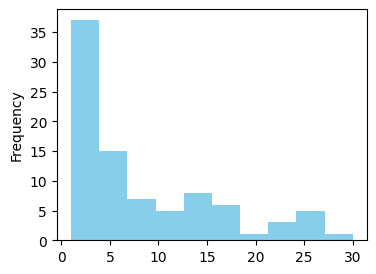

In [5]:
df['Age'].value_counts().plot(kind='hist', figsize=(4, 3), color='skyblue');

## 1.4 Способы описания частотных распределений
Существуют три основные характеристики, которыми можно описать большинство распределений:
1. **Середина** распределения - по мере центральной тенденции
2. **Ширина** распределения
3. **Форма** распределения:
    - Наличие (отсутствие) симметрии
    - Количество мод

<p align="center">
  <img src="../../freq_distributions.png" alt="My Image"/>
</p>

# 2. Меры центральной тенденции

**Меры центральной тенденции**  (МЦТ) помогают определить "центр" распределения данных, то есть значение, которое наилучшим способом описывает **типичное** наблюдение из данных. 

Три типа МЦТ:
- Среднее арифметическое (`mean`)
- Медиана (`median`)
- Мода (`mode`)

## 2.1 Среднее арифметическое

**Среднее арифметическое** — число, равное сумме всех значений в наборе данных*, деленной на количество этих значений.
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i,$$
Где $\bar{x}$ — среднее, $n$ — количество наблюдений, $x_i$ — каждое отдельное наблюдение.

- Рассчитывается только для **количественных** данных
- Одна из наиболее распространенных МЦТ
- **Не устойчива** к выбросам (outliers, экстремальным значениям)
- [**Синтаксис**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html):
    ```python
        table_name['column_name'].mean()
    ```
- [**Визуализация изменения среднего**](https://www.desmos.com/calculator/4ymz8enspu?lang=ru)

*Здесь и далее: набор данных - выборка или генеральная совокупность.

In [36]:
print('Средний возраст пассажиров титаника:')
print(df['Age'].mean().round(2))

Средний возраст пассажиров титаника:
29.7


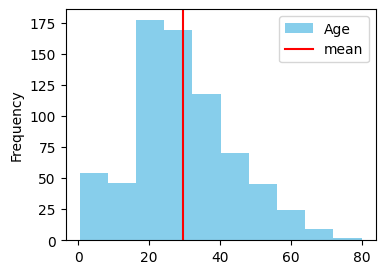

In [37]:
df['Age'].plot(kind='hist', figsize=(4, 3), color='skyblue')
plt.axvline(df['Age'].mean(), color='red', label='mean')
plt.legend();

**Пример-1:**
- Набор данных: $5, 4, 5, 6$
- Среднее арифметическое: $\bar{x} = \frac{5+4+6+5}{4} = 5$

**Пример-2:** добавили выброс
- Набор данных: $5, 4, 5, 6, 180$
- Среднее арифметическое: $\bar{x} = \frac{5+4+6+5+180}{4} = 40$

## 2.2 Медиана

**Медиана** — значение, которое делит распределение пополам: половина значений больше медианы, половина – меньше.

- Рассчитывается только для **количественных** данных
    - Упорядочиваем набор данных
    - При *нечетном* количестве элементов: медиана = центральное значение
    - При *четном* количестве элементов: медиана = среднее двух центральных элементов
- **Устойчива** к выбросам, так как зависит только от центральных элементов в упорядоченном наборе данных
- [**Синтаксис**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html):
    ```python
        table_name['column_name'].median()
    ```

In [38]:
print('Медиана возраста пассажиров титаника:')
print(df['Age'].median())

Медиана возраста пассажиров титаника:
28.0


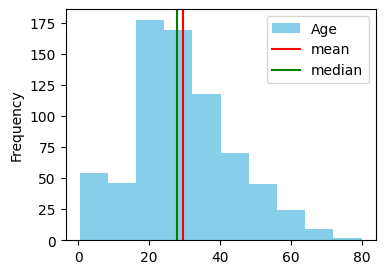

In [39]:
df['Age'].plot(kind='hist', figsize=(4, 3), color='skyblue')
plt.axvline(df['Age'].mean(), color='red', label='mean')
plt.axvline(df['Age'].median(), color='green', label='median')
plt.legend();

**Пример-1:**
- Набор данных (четное число элементов): $5, 4, 5, 6$
- Медиана: 
    - Упорядочиваем набор данных: $4, 5, 5, 6$
    - Медиана: $\frac{5+5}{2} = 5$

**Пример-2:** добавили выброс
- Набор данных (нечетное число элементов): $5, 4, 5, 6, 180$
- Медиана: 
    - Упорядочиваем набор данных: $4, 5, 5, 6, 180$
    - Медиана: $6$

## 2.3 Мода

**Мода** – наиболее часто встречающееся значение (самое "популярное" значение), локальный максимум.

- Рассчитывается для **количественных** и **категориальных** данных
- Для подсчета вручную необходимо строить частотную таблицу и искать самое часто встречающееся значение
- Может быть несколько мод, тогда говорят о уни**мода**льном, би**мода**льном и т.д. распределениях
- **Устойчива** к выбросам, так как выбросы - самые непопулярные значения в данных :)
- [**Синтаксис**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html):
    ```python
        table_name['column_name'].mode()
    ```

In [40]:
print('Мода возраста пассажиров титаника:')
print(df['Age'].mode())

Мода возраста пассажиров титаника:
0    24.0
Name: Age, dtype: float64


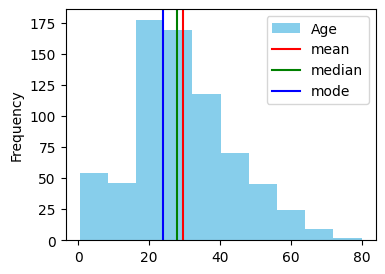

In [41]:
df['Age'].plot(kind='hist', figsize=(4, 3), color='skyblue')
plt.axvline(df['Age'].mean(), color='red', label='mean')
plt.axvline(df['Age'].median(), color='green', label='median')
plt.axvline(df['Age'].mode().item(), color='blue', label='mode')
plt.legend();

In [42]:
print('Мода класса пассажиров титаника:')
print(df['Pclass'].mode())

Мода класса пассажиров титаника:
0    3
Name: Pclass, dtype: int64


In [43]:
df['Pclass'].unique()

array([3, 1, 2])

**Пример-1:**
- Набор данных (четное число элементов): $2, 3, 3, 3, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6$
- Строим частотную таблицу: 

| Значение | Встречаемость |
| -------- | ------------- |
| 2 | 1 | 
| 3 | 3 | 
| 4 | 2 | 
| 5 | 7 | 
| 6 | 1 | 

Тогда $\text{мода} = 5$

# 3. Формы распределений

Хорошее объяснение с графиками: [ссылка](https://www.expii.com/t/normal-distribution-right-and-left-skewed-graphs-5338)

<p align="center">
  <img src="../../distribution_symmetry.jpg" alt="My Image"/>
</p>

## 3.1 Симметричные распределения

* **медиана**=**среднее арифметическое** и находятся посередине
* **Мода** - пик(-и) распределения.
    - В унимодальных распределениях: **мода** = **медиана**=**среднее арифметическое** 
* В данных **нет экстремальных** значений

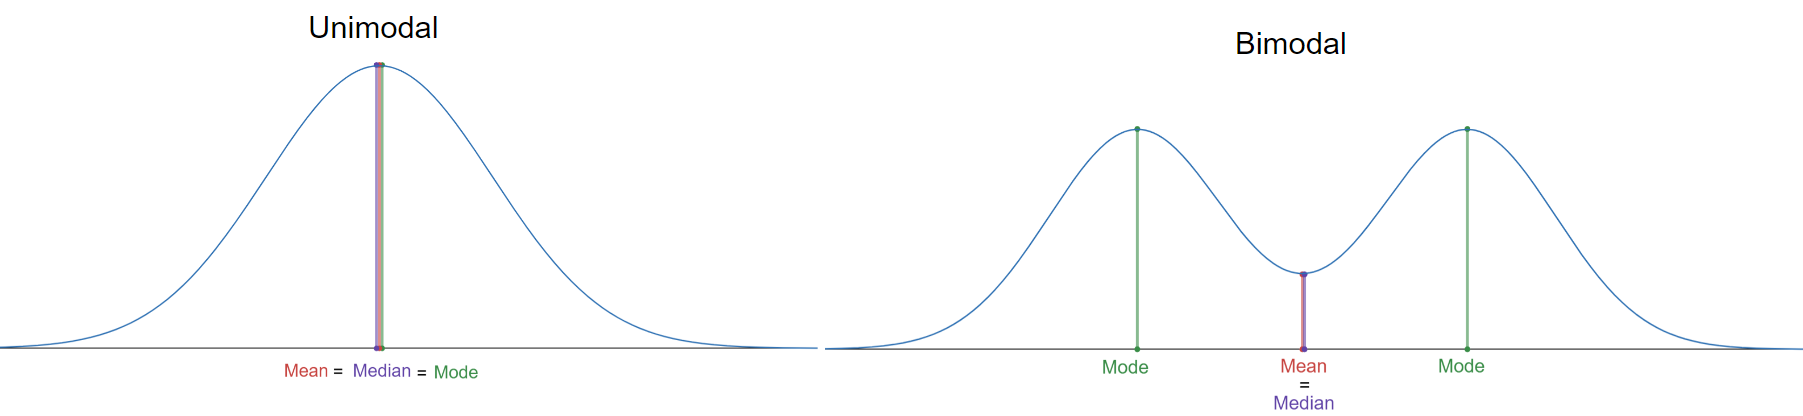

## 3.2 Несимметричные распределения

* **медиана** $\neq$ **среднее арифметическое** $\neq$ **мода**
* Два вида: скошенные влево (отрицательно) и скошенные вправо (положительно)
* "**Скошенность**" относится к тому, где находится **хвост графика** (хвост  - часть графика распределения, которая сужается с одной стороны)

### 3.2.1 Скошенное влево (Left skew)
- **Среднее арифметическое** < **Медиана** < **Мода**
- В данных есть экстремально **низкие** значения

### 3.2.2 Скошенное вправо (Right skew)
-  **Мода** < **Медиана** < **Среднее арифметическое** 
- В данных есть экстремально **высокие** значения

<p align="center">
  <img src="../../L_R_skewed.jpg" alt="My Image"/>
</p>

# 4. Меры разброса

**Меры вариативности (разброса)** - оценка того, насколько данные разбросаны относительно меры центральной тенденции. Помогают понять, насколько варьируются значения в наборе данных, и выявить экстремальные значения (выбросы).

## 4.1 Размах

**Размах** — это разница между максимальным и минимальным значением в наборе данных.

$$\text{Размах} = \max{x} - \min{x},$$
где $x$ - набор данных

- **Не устойчив** к выбросам, так как зависит от самого максимального и минимального значений
- Не учитывает, как данные распределены внутри диапазона

In [8]:
print('Размах возраста пассажиров титаника:')
print(df['Age'].max() - df['Age'].min())

Размах возраста пассажиров титаника:
79.58


## 4.2 Интерквартильный размах (IQR)

### 4.2.1 Что такое квартиль?

**Квантиль уровня q** - значение, меньше которого наблюдается **q** % данных. Синтаксис:
```python
    table_name['column_name'].quantile(q / 100)
```

**Квартиль** — это значения, которые делят данные на 4 равные части. Подсчитываются только для **количественных** данных.

| Квартиль | Обозначение | % данных меньше квартиля | % данных больше квартиля | Синтаксис |
| -------- | ---------- | ---------- | ---------- | ---------- | 
| Нулевой | **Q0** (=минимум) | 0 | 100 | `.min()` или `.quantile(0)` | 
| Первый | **Q1** | 25 | 75 | `.quantile(0.25)` | 
| Второй | **Q2** (=медиана) | 50 | 50 | `.median()` или `.quantile(0.5)` | 
| Третий | **Q3** | 75 | 25 | `.quantile(0.75)` | 
| Четвертый | **Q4** (=максимум) | 100 | 0 | `.max()` или `.quantile(1)` |

... картинка ...

In [9]:
print('Квартили возраста пассажиров титаника:')
print('Q0:', df['Age'].quantile(0))
print('Q1:', df['Age'].quantile(0.25))
print('Q2:', df['Age'].quantile(0.5))
print('Q3:', df['Age'].quantile(0.75))
print('Q4:', df['Age'].quantile(1))

Квартили возраста пассажиров титаника:
Q0: 0.42
Q1: 20.125
Q2: 28.0
Q3: 38.0
Q4: 80.0


### 4.2.2 Подсчет IQR

**Интерквартильный размах** (IQR) —  разница между третьим и первым квартилем:
$$\text{IQR} = \text{Q3} - \text{Q1}$$

- "Смотрит" на центральные 50% наблюдений распределения
- **Устойчив** к выбросам, так как выбросы расположены далеко за $Q1$ (экстремальные минимумы) и $Q3$ (экстремальные максимумы)

In [10]:
print('Интерквартильный размах возраста пассажиров титаника:')
print(df['Age'].quantile(0.75)-df['Age'].quantile(0.25))

Интерквартильный размах возраста пассажиров титаника:
17.875


## 4.3 Стандартное отклонение и дисперсия

**Дисперсия** - средний квадрат отклонений значений от их среднего:
$$\text{var} = \frac{1}{n}\sum_{i=1}^{n}{(x_i - \bar{x})^2},$$
где $\text{var}$ - дисперсия, $n$ - количество наблюдений, $\bar{x}$ - среднее арифметическое

- Высокая дисперсия $\to$ значения сильно варьируются
- Низкая дисперсия $\to$ значения близки к среднему
- **Не устойчива** к выбросам
- **Синтаксис**:
    ```python
        table_name['column_name'].var()
    ```

In [11]:
print('Дисперсия возраста пассажиров титаника:')
print(df['Age'].var())

Дисперсия возраста пассажиров титаника:
211.01912474630802


**Среднеквадратичное отклонение** (стандартное отклонение) — квадратный корень из дисперсии
$$\text{std} = \sqrt{\text{var}}$$
- Аналогично дисперсии, определяет среднее отклонение значений от их среднего арифметического
- Аналогично дисперсии, чем больше стандартное отклонение, тем более вариабельные значения
- Аналогично дисперсии, **не устойчива** к выбросам
- **Синтаксис**:
    ```python
        table_name['column_name'].std()
    ```

In [12]:
print('Стандартное отклонение возраста пассажиров титаника:')
print(df['Age'].std())

Стандартное отклонение возраста пассажиров титаника:
14.526497332334042


In [13]:
df['Age'].std() == df['Age'].var()**(0.5)

np.True_

[**Визуализация изменения стандартного отклонения**](https://www.desmos.com/calculator/iwfwouqqks)

# 5. Пропущенные значения

**Пропущенные значения** — отсутствие данных в одном или нескольких наблюдениях в наборе данных. 
- Могут возникать по различным причинам - например, ошибки при сборе данных или отсутствие ответа на вопрос в анкете
- **`NaN`** (**Not a Number**) - пропущенные / отсутствующие *числовые* значения. То есть мы знаем, что признак в целом числовой, но данных у этого наблюдения нет.
- **`None`** - отсутствие объекта, обычно используется для обозначения пропусков в категориальных или текстовых данных 
- В pandas просто ставит везде `NaN` (чаще всего)

## 5.1 Работа с пропусками

1. **Оценить количество пропусков**. Прежде чем что-то делать с пропусками, необходимо понять, насколько их много в каждом из столбцов.

2. **Модификация пропущенных значений**
    - Пропусков больше чем 40% - **колонку удаляем**
    - Пропусков меньше чем 40%:
        - Данных много: **удаляем** все **строчки** с пропусками
        - Данных мало: **заменяем** все **строчки** с пропусками

## 5.2 Поиск пропусков

### 5.2.1 Количество пропусков

Количество пропусков в каждой из колонок датафрейма- метод [.isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isna.html)

```python
    table_name.isna().sum()
```

In [14]:
# Количество пропусков в каждой колонке
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Доля пропусков в каждой колонке
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Количество пропусков в определенной колонке датафрейма:
```python
    table_name['column_name'].isna().sum()
```

In [16]:
df['Cabin'].isna().sum()

np.int64(687)

### 5.2.2 Просмотр пропусков

Можно посмотреть на строчки, которые содержат пропуск в определенной колонке:
```python
    table_name[table_name['column_name'].isna()]
```

In [17]:
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Можно также посмотреть на строчки, которые, наоборот, **не** содержат пропуск в данной колонке (`~` - отрицание условия):
```python
    table_name[~table_name['column_name'].isna()]
```

In [18]:
df[~df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## 5.3 Модификация пропущенных значений

### 5.2.1 Пропусков много: удаление колонки
- Делаем, когда пропусков в колонке более, чем ~40% от общего количества данных
- Синтаксис

    ``` python
        # вернет датафрейм без колонки - можно сохранить в новую переменную
        table_name.drop('column_name', axis=1)
        
        # удалит колонку из изначального датафрейма
        table_name.drop('column_name', axis=1, inplace=True)
    ```

**P.S.:** если Вы попытаетесь удалить несуществующий столбец из датафрейма - возникнет ошибка. Например, такое может возникнуть при повторном запуске удаления колонки с `inplace=True`

In [19]:
df.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Можно удалять несколько колонок:

```python
    table_name.drop(['column_name_1', 'column_name_2', ...], axis=1)
```

Аналогично можно ставить `inplace=True` - изменит исходный датафрейм, удалив там колонки

In [20]:
df.drop(['Cabin', 'Age'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


### 5.2.2 Пропусков мало: сохранение колонки
- Делаем, когда пропусков в колонки менее, чем ~40% от общего количества данных

#### a) Удаление строк с пропусками
- Делаем, когда данных (наблюдений) много
- Синтаксис (можно также указывать `inplace=True`):
    ```python
        table_name.dropna(subset=['column_name_1', 'column_name_2', ...])
    ```

In [21]:
# Удалит все строчки, где есть хотя бы одно пропущенное значение
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [22]:
# Удалит все строчки, где есть пропущенные значения в колонке Cabin
df.dropna(subset=['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Можно сделать так, чтобы pandas автоматически удалил колонки с как минимум 40% (или другим любым числом) пропусков. То есть нам не обязательно вручную указывать все колонки, где число пропущенных значений >40%:

```python
    table_name.dropna(thresh=0.4 * table_name.shape[0], axis=1)
```

In [23]:
df.dropna(thresh=0.4 * df.shape[0], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### b) Замена пропущенных значений
- Делаем, когда данных (наблюдений) мало
- Можно заменять на:
    - Медиану - для количественных данных
    - Моду - для категориальных данных
    - Ноль - для количественных данных (но лучше так не делать)
- Синтаксис:
    ```python
        table_name['column_name'].fillna(your_value)
    ```

In [24]:
# Количественные данные - заменяем на медиану

# 1. Ищем меру центральной тенденции
med_age = df['Age'].median()

# 2. Заменяем все пропуски в столбце возраст на Медиану и создаем новый столбец без пропущенных значений
df['Age_fillna'] = df['Age'].fillna(med_age)

# 3. Проверяем, что все пропуски заменились
df[['Age', 'Age_fillna']].isna().sum()

Age           177
Age_fillna      0
dtype: int64

In [25]:
# Категориальные данные - заменяем на медиану

# 1. Ищем меру центральной тенденции
mode_emb = df['Embarked'].mode()[0]

# 2. Заменяем все пропуски в столбце Порт на моду и создаем новый столбец без пропущенных значений
df['Embarked_fillna'] = df['Embarked'].fillna(mode_emb)

# 3. Проверяем, что все пропуски заменились
df[['Embarked', 'Embarked_fillna']].isna().sum()

Embarked           2
Embarked_fillna    0
dtype: int64

# 6. Выбросы (outliers)

**Выбросы** (аномалии, *outliers*) — это наблюдения, которые существенно отличаются от остальных значений в наборе данных. 
- Значительно отличаются от значения, выраженного мерой центральной тенденции
- Наличие выбросов свидетельствует о проблемах в данных (ошибки ввода, технические сбои)
- Иногда выбросы имеют важную информацию, например, в исследованиях экстремальных событий. Но такие случаи в этом курсе мы опускаем
- Выбросы влияют на средние значения, дисперсию и некоторые другие статистики - их оценки становятся менее точными, что в принципе ухудшает представление данных

## 6.1 Поиск выбросов: $1.5 \cdot IQR$

**Выбросами** считаются значения, которые находятся **за пределами диапазона**:
$$[\text{Q1} − 1.5 \times \text{IQR}, \text{Q3} + 1.5 \times \text{IQR}]$$

In [26]:
print('Поиск выбросов в признаке "Возраст" с помощью правила "1.5 * IQR"')
# Находим первый и третий квартили
Q1 = df['Age_fillna'].quantile(0.25)
Q3 = df['Age_fillna'].quantile(0.75)

print(f'Q1: {Q1}')
print(f'Q3: {Q3}')

# Вычисляем интерквартильный размах
IQR = Q3 - Q1
print(f'IQR: {IQR}')

# Определяем нижнюю и верхнюю границы, за пределами которых находятся выбросы
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Выбросы находятся вне диапазона: [{lower_bound.round(2)}, {upper_bound.round(2)}]')

Поиск выбросов в признаке "Возраст" с помощью правила "1.5 * IQR"
Q1: 22.0
Q3: 35.0
IQR: 13.0
Выбросы находятся вне диапазона: [2.5, 54.5]


In [27]:
# Фильтрация: смотрим на наблюдения, соответствующие выбросам по признаку Age
df[(df['Age_fillna'] < lower_bound) | (df['Age_fillna'] > upper_bound)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillna,Embarked_fillna
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,2.00,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S,58.00,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S,55.00,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,2.00,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,NaN,S,66.00,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,1.00,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,NaN,62.00,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,0.83,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S,74.00,S


In [28]:
# Можем сохранить выбросы в отдельную переменную (мало ли понадобятся!)
outliers_IQR = df[(df['Age_fillna'] < lower_bound) | (df['Age_fillna'] > upper_bound)]
outliers_IQR.shape

(66, 14)

In [29]:
# Фильтрация: удаляем выбросы, сохраняя таблицу в отдельную переменную
df_without_iqr_outliers = df[(df['Age_fillna'] > lower_bound) & (df['Age_fillna'] < upper_bound)]
df_without_iqr_outliers.shape

(825, 14)

## 6.2 Поиск выбросов: $3 \cdot \text{std}$

Выбросы также можно выявить с помощью стандартного отклонения, которое показывает, насколько данные отклоняются от среднего значения. Согласно этому правилу, **выбросами** считаются данные, которые лежат **за пределами 3 стандартных отклонений от среднего арифметического.**
$$[\bar{x} - 3 \cdot \text{std}, \bar{x} + 3 \cdot \text{std}],$$
где $\bar{x}$ - среднее арифметическое, $\text{std}$ - стандартное отклонение

In [30]:
print('Поиск выбросов в признаке "Возраст" с помощью правила "3 * std"')
# Находим среднее и стандартное отклонение
mean_age = df['Age_fillna'].mean()
std_age = df['Age_fillna'].std()

print(f'Средний возраст: {mean_age}')
print(f'Стандартное отклонение: {std_age}')
print(f'Три стандартных отклонения: {3 * std_age}')

# Определяем нижнюю и верхнюю границы, за пределами которых находятся выбросы
lower_bound_std = mean_age - 3 * std_age
upper_bound_std = mean_age + 3 * std_age

print(f'Выбросы находятся вне диапазона: [{lower_bound_std.round(2)}, {upper_bound_std.round(2)}]')

Поиск выбросов в признаке "Возраст" с помощью правила "3 * std"
Средний возраст: 29.36158249158249
Стандартное отклонение: 13.019696550973201
Три стандартных отклонения: 39.0590896529196
Выбросы находятся вне диапазона: [-9.7, 68.42]


In [31]:
# Фильтрация: смотрим на наблюдения, соответствующие выбросам по признаку Age
df[(df['Age_fillna'] < lower_bound_std) | (df['Age_fillna'] > upper_bound_std)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillna,Embarked_fillna
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,71.0,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,70.5,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,71.0,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,80.0,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,70.0,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,70.0,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,74.0,S


In [32]:
# Можем сохранить выбросы в отдельную переменную
outliers_std = df[(df['Age_fillna'] < lower_bound_std) | (df['Age_fillna'] > upper_bound_std)]
outliers_std.shape

(7, 14)

In [33]:
# Фильтрация: удаляем выбросы, сохраняя таблицу в отдельную переменную
df_without_std_outliers = df[(df['Age_fillna'] > lower_bound_std) & (df['Age_fillna'] < upper_bound_std)]
df_without_std_outliers.shape

(884, 14)

## 6.3 Визуализация выбросов: ящик с усами

**Ящик с усами** (boxplot) показывает распределение данных по их **квартилям**
- Позволяет увидеть *меру центральной тенденции* (медиану)
- Позволяет увидеть *вариативность* данных (IQR)
- Позволяет оценить симметричность распределения
- Наглядно отображает *выбросы*
- Строится только для **количественных** данных

**Из чего состоит?**
1. **Медиана** — это линия внутри "ящика" (прямоугольника), которая делит данные пополам. Половина данных находится ниже медианы, половина — выше.
    - Если медиана находится ~посередине ящика, то распределение данных симметрично
    - Если медиана находится ближе к одному из краев ящика, то распределение данных несимметрично.

2. **Границы ящика**
    - **Первый квартиль=Q1** - нижняя граница ящика, ниже которой лежат 25% данных
    - **Третий квартиль=Q3** - верхняя граница ящика, выше которой лежат 25% данных
    - **IQR = Q3 - Q1** - расстояние между третьим и первым квартилями, то есть *размер ящика*. Внутри "ящика" - центральные 50% всех наблюдений. 
        - Если "ящик" широкий (большой IQR) - высокая вариабельность данных
        - Если "ящик" узкий (маленький IQR) - низкая вариабельность данных

3. **Усы (whiskers)** — вертикальные линии, которые выходят за пределы ящика. 
    - Соответствуют диапазону $[\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR}]$
    - Это диапазон данных без выбросов согласно правилу "$1.5 \cdot \text{IQR}$"
    - Все значения за пределами этих границ считаются **выбросами**.

4. **Выбросы** — точки, которые лежат за пределами усов.
    - Считаются выбросами согласно правилу "$1.5 \cdot \text{IQR}$", так как находятся за пределами усов
    - На графике отображаются как отдельные точки

!!!картинка

Синтаксис:
```python
    # вертикальный ящик
    table_name['column_name'].plot(kind='box')

    # горизонтальный ящик
    table_name['column_name'].plot(kind='box', vert=False)
```

<Axes: >

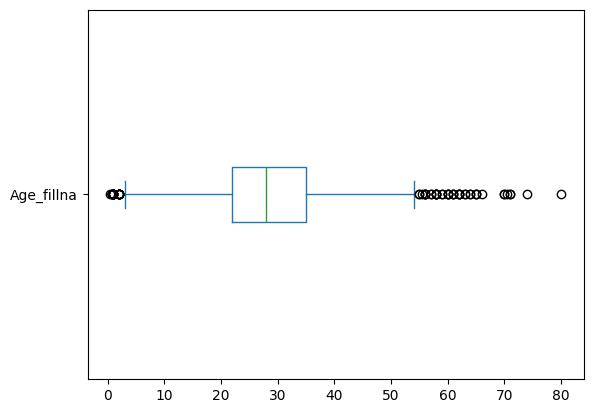

In [34]:
df['Age_fillna'].plot(kind='box', vert=False)

<Axes: >

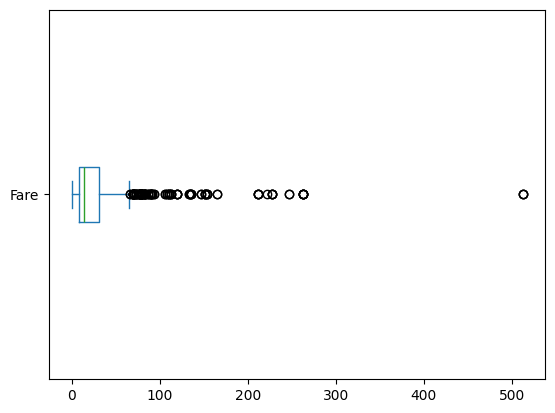

In [35]:
df['Fare'].plot(kind='box', vert=False)

# Задания НЭ

## [A4](https://edu.hse.ru/mod/quiz/view.php?id=1220241)

## [A5](https://edu.hse.ru/mod/quiz/view.php?id=1220242)

## [A6](https://edu.hse.ru/mod/quiz/view.php?id=1220243)

## B3